<a href="https://colab.research.google.com/github/varshini0317/NeubAItics/blob/main/heart_predi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:

# Importing the dataset


dataset = pd.read_csv('/content/cleve.csv')



In [21]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
num         0
dtype: int64

In [26]:
dataset.fillna(0, inplace=True)

In [27]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [28]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values

In [31]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size = 0.25, random_state = 101)


In [32]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)



dataset.num.value_counts()


num
0    165
1    138
Name: count, dtype: int64

In [33]:
#### logistic regression

#fitting LR to training set

from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)


LogisticRegression()

In [34]:

#Predict the test set results

y_Class_pred=classifier.predict(X_test)



In [35]:
#checking the accuracy for predicted results

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_Class_pred)


0.8552631578947368

In [36]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_Class_pred)


In [37]:
#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_Class_pred))


              precision    recall  f1-score   support

           0       0.80      0.95      0.87        38
           1       0.94      0.76      0.84        38

    accuracy                           0.86        76
   macro avg       0.87      0.86      0.85        76
weighted avg       0.87      0.86      0.85        76



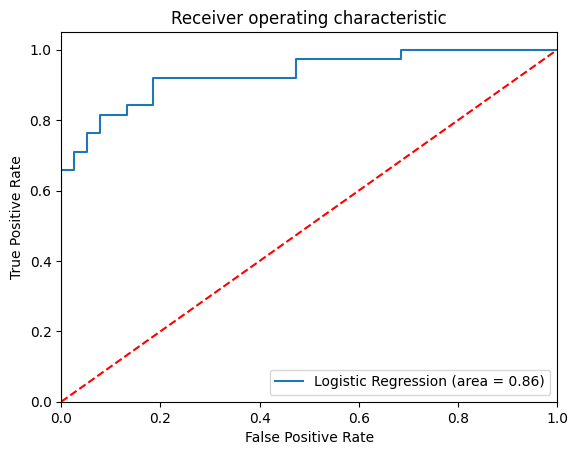

In [38]:

#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [39]:

##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('/content/newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
